In [1]:
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import g4root_to_df
from root_pandas import read_root
import pandas as pd
from mu2e.mu2eplots import mu2e_plot3d_ptrap
from mu2e.mu2eplots import mu2e_plot3d_ptrap_traj
from mu2e.mu2eplots import mu2e_plot3d_ptrap_anim
import mu2e.mu2eplots as mplt
import six.moves.cPickle as pkl
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
mu2e_data_path = '/Volumes/DataDump/Mu2E/'
from skhep.visual import MplPlotter as splt
from matplotlib.colors import LogNorm
pd.set_option("display.max_columns",50)
from IPython.display import display, HTML
from tqdm import tnrange

Welcome to JupyROOT 6.12/06


<IPython.core.display.Javascript object>

In [2]:
# Get pions, make a subset df of matching pions and muons
df_ntpart_s1, _, _ = g4root_to_df(mu2e_data_path+'pion-st-full-Mau13/run1/nts.bpollack.pions_Mau13_stage1_vd.v656.combined',
do_basic_modifications=True, trees=['part'])
df_ntpart_s1.set_index(['run', 'subrun', 'evt'], inplace=True)


In [3]:
golden_index = pd.read_pickle('golden_index.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'golden_index.pkl'

In [ ]:
splt.hist(df_comb.parent_p)
plt.title('Bad Pion Birth Mom')
plt.xlabel('p (MeV)')

plt.figure()
splt.hist(df_comb.parent_pz)
plt.title('Bad Pion Birth Pz')
plt.xlabel('pz (MeV)')

plt.figure()
obj = splt.hist(df_comb.parent_pz/df_comb.parent_p)
plt.title('Bad Pion Birth Cos(z)')
plt.xlabel('cos(z)')

plt.figure()
splt.hist(df_comb.parent_z, range = (5000,6500))
plt.title('Bad Pion Birth Z pos')
plt.xlabel('Z mm')

plt.figure()
plt.hexbin(df_comb.query('-100<parent_x<100 and -100<parent_y<100').parent_x, df_comb.query('-100<parent_x<100 and -100<parent_y<100').parent_y)
plt.colorbar()
plt.title('Bad Pion X,Y')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

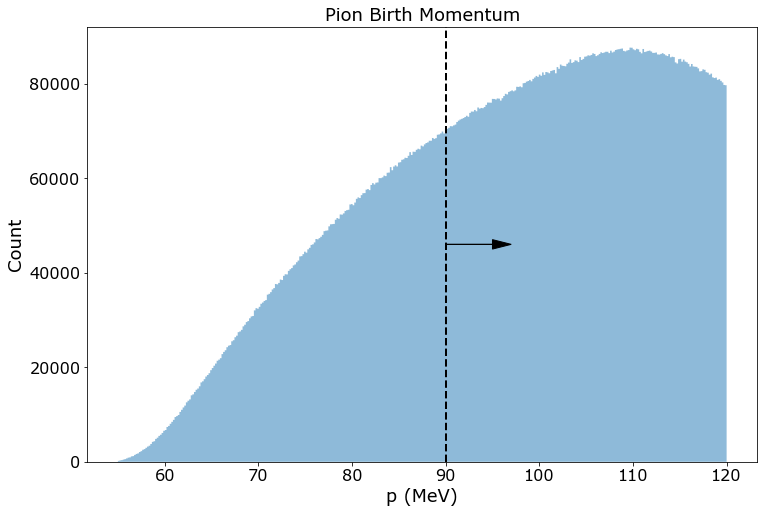

In [17]:
splt.hist(df_ntpart_s1.parent_p)
plt.title('Pion Birth Momentum')
plt.ylabel('Count')
plt.xlabel('p (MeV)')
plt.gca().axvline(90, linewidth=2, color='k', linestyle='--')
plt.arrow(90, plt.gca().get_ylim()[1]*0.5, 5, 0, head_width=2000, head_length=2, color='k')
plt.savefig('plots_tmp/pion_s2_birth_mom.pdf')

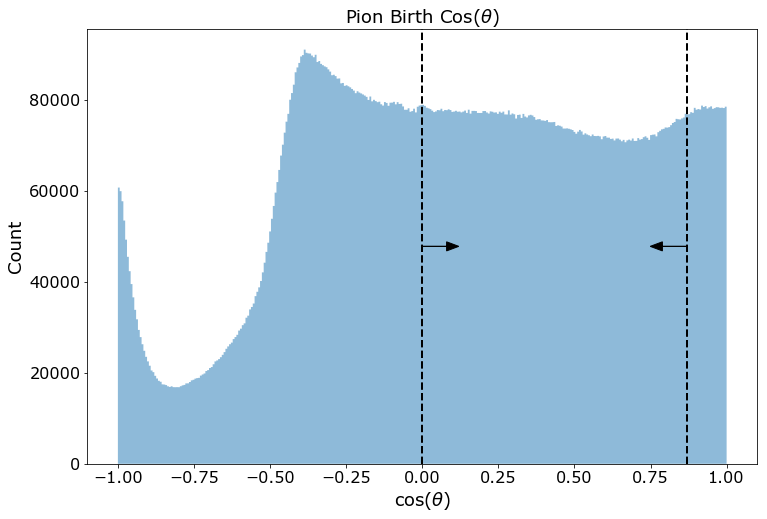

In [4]:
splt.hist(df_ntpart_s1.parent_pz/df_ntpart_s1.parent_p)
plt.title(r'Pion Birth Cos($\theta$)')
plt.ylabel('Count')
plt.xlabel(r'cos($\theta$)')
plt.gca().axvline(0, linewidth=2, color='k', linestyle='--')
plt.gca().axvline(0.869, linewidth=2, color='k', linestyle='--')
plt.arrow(0, plt.gca().get_ylim()[1]*0.5, 0.08, 0, head_width=2000, head_length=0.04, color='k')
plt.arrow(0.869, plt.gca().get_ylim()[1]*0.5, -0.08, 0, head_width=2000, head_length=0.04, color='k')
plt.savefig('plots_tmp/pion_s2_birth_cosz.pdf')

In [ ]:
store_xray = pd.HDFStore(mu2e_data_path+'G4ParticleSim/low_e_ele_0T_v580.h5')
df_xray = store_xray.df_ntpart
store_xray.close()

In [ ]:
splt.hist(df_ntpart.query('pdg==11').parent_pz, bins=65, range=(-130,130), label='pz')
splt.hist(df_ntpart.query('pdg==11').parent_px, bins=65, range=(-130,130), label='px')
splt.hist(df_ntpart.query('pdg==11').parent_py, bins=65, range=(-130,130), label='py')
plt.title('Muon Birth Momentum')
plt.xlabel('MeV')
plt.legend()

In [ ]:
splt.hist(df_ntpart.query('pdg==11').parent_z, log=True)
plt.title('Muon Birth Z')
plt.xlabel('Z (mm)')

In [ ]:
splt.hist(df_ntpart.query('pdg==11').pz, bins=65, range=(-130,130), label='pz', )
splt.hist(df_ntpart.query('pdg==11').px, bins=65, range=(-130,130), label='px', )
splt.hist(df_ntpart.query('pdg==11').py, bins=65, range=(-130,130), label='py',)
splt.hist(df_ntpart.query('pdg==11').p, bins=65, range=(-130,130), label='p_mag', )
plt.title('Electron Birth Momentum')
plt.xlabel('MeV')
plt.legend(loc=2)

In [ ]:
splt.hist(df_ntpart.query('pdg==11').z, log=True)
plt.title('Electron Birth Z')
plt.xlabel('Z (mm)')

In [ ]:
splt.hist(df_ntpart.query('pdg==11').zstop, log=True)
plt.title('Electron Termination Z')
plt.xlabel('Z (mm)')

In [ ]:
splt.hist(df_ntpart.query('pdg==11').tstop, log=True)
plt.title('Electron Termination Time (not including S0 time)')
plt.xlabel('t (ns)')

In [ ]:
plt.hexbin(df_ntpart.p, df_ntpart.tstop, bins='log')
plt.colorbar()
plt.title('Electron Mom vs Stop Time')
plt.xlabel('p (MeV)')
plt.ylabel('t (ns)')

In [ ]:
plt.hexbin(df_ntpart.query('tstop>200').p, df_ntpart.query('tstop>200').tstop, bins='log')
plt.colorbar()
plt.title('Electron Mom vs Stop Time')
plt.xlabel('p (MeV)')
plt.ylabel('t (ns)')

In [ ]:
plt.hexbin(df_ntpart.p, df_ntpart.zstop, bins='log')
plt.colorbar()
plt.title('Electron Mom vs Stop Position')
plt.xlabel('p (MeV)')
plt.ylabel('Z (mm)')

In [ ]:
long_live_index = df_ntpart.query('pdg==11 and tstop>200').index

In [ ]:
df_nttvd = df_nttvd.loc[long_live_index]

In [ ]:
mu2e_plot3d_ptrap(df_ntpart.ix[0:50000],
                  'parent_z','parent_x','parent_y', x_range=[3700,17500], y_range = [-1000,1000], z_range=[-1000,1000], save_name=None,
                   df_xray=df_xray, color='parent_p', title='Muon position at stage2 start')

In [ ]:
df_ntpart.sort_values('tstop').tail()

In [ ]:
#df_pi_single_s1 = df_nttvd_s1.query('subrun==1145 and evt==30467 and pdg<0').sort_values('time')
#df_pi_single_s1.name = 'Pion'
df_mu_single_s2e1 = df_nttvd.query('run==2 and subrun==291 and evt==8831 and job ==9076398 and pdg==13').sort_values('time')
df_mu_single_s2e1.name = 'Muon1'
df_e_single_s2e1 = df_nttvd.query('run==2 and subrun==291 and evt==8831 and job ==9076398 and pdg==11').sort_values('time')
df_e_single_s2e1.name = 'Electron1'

df_mu_single_s2e2 = df_nttvd.query('run==1 and subrun==1679 and evt==60831 and job==9075987 and pdg==13').sort_values('time')
df_mu_single_s2e2.name = 'Muon2'
df_e_single_s2e2 = df_nttvd.query('run==1 and subrun==1679 and evt==60831 and job==9075987 and pdg==11').sort_values('time')
df_e_single_s2e2.name = 'Electron2'

In [ ]:
df_mu_single_s2e2

In [ ]:
mu2e_plot3d_ptrap_traj([df_mu_single_s2e1, df_e_single_s2e1, df_mu_single_s2e2, df_e_single_s2e2],'z','x','y',df_xray=df_xray,
                        title='Long Event', aspect='default')
#mu2e_plot3d_ptrap_traj([df_pi_single_s1, df_mu_single_s2e1, df_e_single_s2e1, df_mu_single_s2e2, df_e_single_s2e2],
#                       'z','x','y',df_xray=df_xray,
#                        title='Bad Pion Adventure', aspect='default')

In [ ]:
possible_signal_index = df_ntpart.query('pdg==11 and p>104 and zstop>11700').index

In [ ]:
cut_index = df_nttvd.loc[possible_signal_index].query('z<9200').index

In [ ]:
df_ntpart.loc[cut_index].size